# Introduction

**Kelompok 01 - Final Project 1 (Introduction to Python Kampus Merdeka)**<br>

Putu Wahyu Kusuma Wardhana<br>
PYTN-KS05-001

Aditya Gumilar<br>
PYTN-KS05-002

Taufik Aji Putr<br>
PYTN-KS05-003

# Project Overview

Kumpulan data ini berisi informasi tentang catatan transaksi perjalanan menggunakan taksi Uber dan Lyft. Tujuan utama dari penelitian ini adalah untuk memprediksi harga perjalanan (Price) yang paling tepat dengan menggunakan analisis prediksi menggunakan algoritma Regresi Linier (Linear Regression). 

Pemilihan algoritma Regresi Linier dalam project ini, akan dicoba untuk memprediksi harga perjalanan (Price) menggunakan data dari waktu sebelumnya. Regresi linier mencoba memodelkan hubungan antara variabel dependen dan variabel independen dengan membuat persamaan linier untuk mengamati data. Regresi linier mencoba menemukan hubungan matematis antar variabel. 

Sebelum melakukan proses pemodelan menggunakan algoritma regresi linier, perlu dilakukan pemilihan fitur yang benar agar dapat memaksimalkan kinerja model yang akan dibuat nantinya.

Database ini memiliki 57 atribut, tetapi yang paling relevan ada 10 atribut dari semuanya. Final Project 1 ini dibuat guna mengevaluasi konsep Regression sebagai berikut: 
- Mampu memahami konsep regression dengan Linear Regression 
- Mampu mempersiapkan data untuk digunakan dalam model Linear Regression 
- Mampu mengimplementasikan Linear Regression untuk membuat prediksi

**Attribute Information**

1. id
2. timestamp
3. hour
4. day
5. month
6. datetime
7. timezone
8. source: destinasi awal
9. destination: destinasi akhir
10. cab_type: tipe transportasi (uber / lyft)
11. dan lainnya


# Import Library

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

# Data Preparation

**Mengimport dataset yang akan digunakan**

In [45]:
df = pd.read_csv('./Dataset/rideshare_kaggle.csv')
df

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


In [46]:
df.shape

(693071, 57)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [48]:
df.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,...,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,...,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,...,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,...,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,...,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,...,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,...,0.091600,1.544807e+09,38.880000,1.544789e+09,46.910000,1.544814e+09,35.710000,1.544789e+09,44.120000,1.544818e+09
max,1.545161e+09,23.000000,30.000000,12.000000,97.500000,7.860000,3.000000,42.366100,-71.033000,57.220000,...,0.145900,1.545152e+09,43.100000,1.545192e+09,57.870000,1.545109e+09,40.050000,1.545134e+09,57.200000,1.545109e+09


# Data Cleaning

## Handling Missing Values

In [49]:
df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

**Menghapus missing value**

In [50]:
df = df.dropna(subset=['price']).reset_index()

In [51]:
df.isnull().sum()

index                          0
id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatur

## Drop Features

**Melihat unique values dari setiap Features (Keseluruhan)**

In [52]:
for col in df.columns:
    print("Unique Values for: ", col.upper())
    print("Count: ", df[col].nunique())
    print("-"*25)
    print(df[col].unique())
    print('='*50)

Unique Values for:  INDEX
Count:  637976
-------------------------
[     0      1      2 ... 693067 693069 693070]
Unique Values for:  ID
Count:  637976
-------------------------
['424553bb-7174-41ea-aeb4-fe06d4f4b9d7'
 '4bd23055-6827-41c6-b23b-3c491f24e74d'
 '981a3613-77af-4620-a42a-0c0866077d1e' ...
 '633a3fc3-1f86-4b9e-9d48-2b7132112341'
 '727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e'
 'e7fdc087-fe86-40a5-a3c3-3b2a8badcbda']
Unique Values for:  TIMESTAMP
Count:  35796
-------------------------
[1.54495261e+09 1.54328402e+09 1.54336682e+09 ... 1.54473751e+09
 1.54502280e+09 1.54372728e+09]
Unique Values for:  HOUR
Count:  24
-------------------------
[ 9  2  1  4  3 18  5 19  6 10 16 22 23  0 11  7 20 13 14  8 12 21 17 15]
Unique Values for:  DAY
Count:  17
-------------------------
[16 27 28 30 29 17 26  2  3 13 14 18  1 15  4 10  9]
Unique Values for:  MONTH
Count:  2
-------------------------
[12 11]
Unique Values for:  DATETIME
Count:  31350
-------------------------
['2018-12-16 09:30:0

[37.12 37.35 32.93 29.63 30.88 33.51 41.99 49.22 45.58 41.77 38.   35.66
 38.08 20.38 32.85 36.01 31.25 37.19 35.52 37.54 12.26 31.86 37.83 42.02
 35.63 37.1  42.13 35.21 43.63 37.84 46.21 43.92 36.11 34.81 34.01 36.97
 27.93 43.   29.99 36.6  40.8  46.74 35.84 27.22 43.51 36.5  37.25 47.27
 41.3  48.12 33.   37.38 57.22 13.84 34.59 44.16 35.13 32.35 13.25 48.43
 39.09 52.1  30.56 31.03 49.7  46.32 32.4  35.18 15.11 35.92 32.46 34.6
 39.31 34.73 12.13 30.15 38.23 14.24 43.61 32.04 35.62 44.19 54.62 27.83
 31.91 45.69 44.64 14.47 39.99 24.17 38.41 50.43 46.78 13.96 38.21 36.71
 37.39 48.45 30.98 28.18 43.49 54.38 34.07 20.78 32.   27.71 53.51 42.54
 25.35 39.93 14.02 37.73 15.44 31.8  41.   38.03 41.07 36.49 38.19 30.89
 19.09 37.56 43.64 28.85 35.14 34.35 46.18 35.68 35.9  30.58 38.44 34.5
 40.08 53.34 45.78 32.72 45.36 47.96 37.66 37.6  37.51 40.86 36.05 32.45
 33.55 31.92 31.24 44.41 39.55 14.77 29.5  37.06 35.   52.9  36.87 34.55
 48.11 31.57 28.02 42.47 32.37 33.81 37.47 52.45 34.0

[' partly-cloudy-night ' ' rain ' ' clear-night ' ' cloudy ' ' fog '
 ' clear-day ' ' partly-cloudy-day ']
Unique Values for:  DEWPOINT
Count:  313
-------------------------
[32.7  41.83 31.1  26.64 28.61 34.41 39.54 48.02 44.5  43.52 27.99 29.72
 27.31 10.87 18.66 37.56 20.53 26.83 30.94 34.56  9.22 27.27 35.13 39.47
 31.96 31.67 43.32 31.63 30.89 40.83 46.13 29.78 36.81 28.31 28.08 35.8
 22.79 43.75 28.39 32.52 33.96 44.71 28.91 26.45 41.5  31.68 27.12 45.86
 39.51 46.76 29.86 41.98 47.14  9.15 29.27 44.19 29.57 29.33  9.85 46.7
 26.98 50.67 35.31 27.26 48.54 44.89 28.96 31.61  9.98 31.95 27.2  28.36
 36.14 27.29  8.55 35.26  7.06 28.63 28.1  43.94 37.03 26.99 29.42 44.36
 31.82 10.7  39.17 15.74 34.28 32.42 45.78  6.46 27.65 29.05 34.39 27.87
 26.59 44.14 49.27 31.05  9.69 27.86 22.07 42.99 42.14 23.09 41.99  6.89
 33.41 10.29 32.91 27.14 32.06 26.27 41.58 39.06 33.58 14.76 33.71 27.9
 29.17 28.43 31.81 30.32 28.42 25.09 27.35 37.83 33.19 35.04 44.22 26.77
 43.33 47.06 39.68 31.27 3

Count:  128
-------------------------
[43.68 47.3  47.55 45.03 42.18 40.66 46.46 50.8  57.02 46.91 42.32 42.72
 42.52 33.83 43.83 44.61 43.78 46.83 38.03 44.66 46.49 41.35 54.29 47.06
 46.45 50.94 46.61 42.58 42.6  54.47 44.11 57.87 52.86 42.61 54.4  38.11
 42.13 50.37 44.96 46.74 33.51 41.44 42.05 46.7  37.95 42.7  43.63 46.65
 46.89 57.27 44.82 57.42 46.97 36.12 51.12 33.92 44.68 42.57 50.99 47.11
 57.04 44.8  46.67 46.27 38.1  33.82 33.96 43.8  44.65 43.76 46.9  57.52
 45.12 54.48 56.89 46.24 41.58 33.81 46.5  37.96 46.59 43.7  41.51 43.73
 46.72 44.72 33.88 50.73 43.61 37.99 44.76 33.62 44.75 54.44 41.42 41.38
 46.51 43.74 42.68 54.46 37.92 41.39 46.68 44.5  38.   54.43 46.63 46.39
 37.84 34.02 57.08 33.78 50.78 42.64 46.6  44.54 41.41 42.42 46.35 35.97
 46.41 44.89 54.38 35.49 42.51 36.29 46.28 46.15]
Unique Values for:  TEMPERATUREMAXTIME
Count:  23
-------------------------
[1544968800 1543251600 1543320000 1543510800 1543420800 1545022800
 1543255200 1543788000 1543852800 15436

Berdasarkan hasil dari melihat unique values dan preferensi dalam membuat model nantinya, akan dilakukan penghapusan beberapa features di awal seperti:

1. Kolom "index" tidak diperlukan karena duplikasi dari index yang sudah ada.
2. Kolom "id" tidak diperlukan karena nilainya sangat unik dan mewakili setiap input.
3. Kolom 'timestamp" dan "datetime" tidak diperlukan karena sudah dipecah menjadi month, day , dan hour.
4. Kolom "timezone" tidak diperlukan karena hanya memiliki 1 values.
5. Kolom "long_summary" karena kolom "short_summary" sudah mewakili.
6. Kolom yang berkaitan dengan waktu, seperti windGustTime dan lainnya, tidak diperlukan karena sudah diwakili oleh kolom "month", "day", dan "hour"
7. Kolom "Longitude" dan "Latitude" tidak diperlukan karena sudah diwakili oleh 
 

In [53]:
df = df.drop(['index','id','timezone', 'timestamp','datetime','long_summary','apparentTemperatureHighTime',
              'apparentTemperatureLowTime','windGustTime','sunriseTime','sunsetTime','uvIndexTime','temperatureMinTime',
              'temperatureMaxTime','apparentTemperatureMinTime','temperatureLowTime','apparentTemperatureMaxTime',
              'latitude','longitude'],axis=1)
print(df.shape)
df.head()

(637976, 39)


,hour,day,month,source,destination,cab_type,product_id,name,price,distance,...,cloudCover,uvIndex,visibility.1,ozone,moonPhase,precipIntensityMax,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
0,9,16,12,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,...,0.72,0,10.000,303.8,0.30,0.1276,39.89,43.68,33.73,38.07
1,2,27,11,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,...,1.00,0,4.786,291.1,0.64,0.1300,40.49,47.30,36.20,43.92
2,1,28,11,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,...,0.03,0,10.000,315.7,0.68,0.1064,35.36,47.55,31.04,44.12
3,4,30,11,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,...,0.00,0,10.000,291.1,0.75,0.0000,34.67,45.03,30.30,38.53
4,3,29,11,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,...,0.44,0,10.000,347.7,0.72,0.0001,33.10,42.18,29.11,35.75


**Melihat unique values dari setiap Features (Kategorik)**

- Membuat dataframe berisikan feature kategorikal

In [54]:
# Membuat dataframe berisikan feature kategorikal
categorical_columns = df.select_dtypes(include=['object','category']).columns.tolist()
df_categorical = df[categorical_columns]
df_categorical.head()

,source,destination,cab_type,product_id,name,short_summary,icon
0,Haymarket Square,North Station,Lyft,lyft_line,Shared,Mostly Cloudy,partly-cloudy-night
1,Haymarket Square,North Station,Lyft,lyft_premier,Lux,Rain,rain
2,Haymarket Square,North Station,Lyft,lyft,Lyft,Clear,clear-night
3,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,Clear,clear-night
4,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,Partly Cloudy,partly-cloudy-night


- Mengecek nilai unik pada setiap feature kategorikal

In [55]:
for col in categorical_columns:
    print("Unique Values for: ", col.upper())
    print("Count: ", df[col].nunique())
    print("-"*25)
    print(df[col].unique())
    print('='*50)

Unique Values for:  SOURCE
Count:  12
-------------------------
['Haymarket Square' 'Back Bay' 'North End' 'North Station' 'Beacon Hill'
 'Boston University' 'Fenway' 'South Station' 'Theatre District'
 'West End' 'Financial District' 'Northeastern University']
Unique Values for:  DESTINATION
Count:  12
-------------------------
['North Station' 'Northeastern University' 'West End' 'Haymarket Square'
 'South Station' 'Fenway' 'Theatre District' 'Beacon Hill' 'Back Bay'
 'North End' 'Financial District' 'Boston University']
Unique Values for:  CAB_TYPE
Count:  2
-------------------------
['Lyft' 'Uber']
Unique Values for:  PRODUCT_ID
Count:  12
-------------------------
['lyft_line' 'lyft_premier' 'lyft' 'lyft_luxsuv' 'lyft_plus' 'lyft_lux'
 '6f72dfc5-27f1-42e8-84db-ccc7a75f6969'
 '6c84fd89-3f11-4782-9b50-97c468b19529'
 '55c66225-fbe7-4fd5-9072-eab1ece5e23e'
 '9a0e7b09-b92b-4c41-9779-2ad22b4d779d'
 '6d318bcc-22a3-4af6-bddd-b409bfce1546'
 '997acbb5-e102-41e1-b155-9df7de0a73f2']
Unique Va

**Melihat unique values dari setiap Features (Numerik)**

- Membuat dataframe berisikan feature kategorikal

In [56]:
numerical_columns = df.select_dtypes(include=['int64','float64']).columns.tolist()
df_numerical = df[numerical_columns]
df_numerical.head()

,hour,day,month,price,distance,surge_multiplier,temperature,apparentTemperature,precipIntensity,precipProbability,...,cloudCover,uvIndex,visibility.1,ozone,moonPhase,precipIntensityMax,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
0,9,16,12,5.0,0.44,1.0,42.34,37.12,0.0000,0.0,...,0.72,0,10.000,303.8,0.30,0.1276,39.89,43.68,33.73,38.07
1,2,27,11,11.0,0.44,1.0,43.58,37.35,0.1299,1.0,...,1.00,0,4.786,291.1,0.64,0.1300,40.49,47.30,36.20,43.92
2,1,28,11,7.0,0.44,1.0,38.33,32.93,0.0000,0.0,...,0.03,0,10.000,315.7,0.68,0.1064,35.36,47.55,31.04,44.12
3,4,30,11,26.0,0.44,1.0,34.38,29.63,0.0000,0.0,...,0.00,0,10.000,291.1,0.75,0.0000,34.67,45.03,30.30,38.53
4,3,29,11,9.0,0.44,1.0,37.44,30.88,0.0000,0.0,...,0.44,0,10.000,347.7,0.72,0.0001,33.10,42.18,29.11,35.75


- Mengecek setiap nama kolom pada feature numerical

In [57]:
df_numerical.columns

Index(['hour', 'day', 'month', 'price', 'distance', 'surge_multiplier',
       'temperature', 'apparentTemperature', 'precipIntensity',
       'precipProbability', 'humidity', 'windSpeed', 'windGust', 'visibility',
       'temperatureHigh', 'temperatureHighTime', 'temperatureLow',
       'apparentTemperatureHigh', 'apparentTemperatureLow', 'dewPoint',
       'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'visibility.1',
       'ozone', 'moonPhase', 'precipIntensityMax', 'temperatureMin',
       'temperatureMax', 'apparentTemperatureMin', 'apparentTemperatureMax'],
      dtype='object')

- Mengecek nilai unik pada setiap feature numerikal

In [58]:
for col in numerical_columns:
    print("Unique Values for: ", col.upper())
    print("Count: ", df[col].nunique())
    print("-"*25)
    print(df[col].unique())
    print('='*50)

Unique Values for:  HOUR
Count:  24
-------------------------
[ 9  2  1  4  3 18  5 19  6 10 16 22 23  0 11  7 20 13 14  8 12 21 17 15]
Unique Values for:  DAY
Count:  17
-------------------------
[16 27 28 30 29 17 26  2  3 13 14 18  1 15  4 10  9]
Unique Values for:  MONTH
Count:  2
-------------------------
[12 11]
Unique Values for:  PRICE
Count:  147
-------------------------
[ 5.   11.    7.   26.    9.   16.5  10.5   3.   27.5  13.5  12.   16.
  7.5   5.5   3.5   8.5  15.   20.5  19.5  29.5   9.5  22.   13.   17.
 10.   34.   18.5  36.   22.5  32.5  25.   27.   35.    8.   23.5  14.
 26.5  38.5  23.   30.5  17.5  30.   36.5  12.5  33.5  21.5  38.   18.
 33.   32.    6.5  11.5  31.5  28.5  24.   29.   31.   42.5  41.   19.
 52.5  67.5  15.5  21.   45.5  28.   37.5  14.5  47.5   4.5  40.5  55.
 42.   46.5  50.5  24.5  41.5  56.   25.5  39.   57.5  20.   39.5   6.
 35.5  48.5  37.   45.   44.   34.5   2.5  46.   48.   47.   54.   52.
 62.   43.   43.5  80.   65.   51.5  40.   49.5 

[27.39 36.2  29.11 26.2  30.29 12.04 37.08 45.62 28.53 30.19 28.1  32.25
 28.06 24.61 28.3  26.41 28.21 29.97 14.29 27.26 36.7  11.99 35.18 30.13
 38.78 45.53 38.58 27.95 31.97 35.08 35.23 27.22 47.25 32.12 35.32 14.31
 25.87 45.44 34.85 29.07 30.36 27.16 12.3  38.98 14.48 31.87 28.27 38.56
 11.82 31.82 29.88 28.   35.22 28.23 38.72 18.29 45.61 27.99 24.47 27.2
 31.91 45.69 35.69 30.03 28.18 26.3  37.09 14.53 27.76 24.55 28.19 35.53
 27.89 28.12 38.71 29.03 34.83 28.72 30.08 12.05 27.7  34.99 36.61 14.27
 36.47 28.11 12.12 28.43 35.55 27.41 45.64 28.61 14.26 26.32 14.44 27.72
 27.64 35.05 11.83 35.48 11.86 38.65 28.17 27.8  35.17 13.73 11.81 32.23
 38.85 35.6  28.4  14.28 35.27 38.59 37.23 14.06 24.51 15.9  27.77 27.23
 45.36 27.88 36.51 35.39 11.84 15.33 29.98 19.4  36.93 29.29 34.73 17.82
 19.19 31.79 39.27 39.21]
Unique Values for:  DEWPOINT
Count:  313
-------------------------
[32.7  41.83 31.1  26.64 28.61 34.41 39.54 48.02 44.5  43.52 27.99 29.72
 27.31 10.87 18.66 37.56 20.53 2

Count:  125
-------------------------
[38.07 43.92 44.12 38.53 35.75 34.97 43.81 50.13 56.35 44.01 40.48 36.75
 40.53 32.85 38.38 38.21 38.39 43.85 31.92 38.3  43.84 35.88 53.62 44.15
 43.71 50.27 36.58 53.8  43.44 57.2  52.19 36.57 53.73 31.96 40.95 49.7
 38.85 43.93 32.84 36.09 41.38 44.06 32.03 36.77 38.4  43.86 35.95 36.56
 56.6  56.75 44.24 29.98 50.45 32.95 38.34 36.55 50.32 43.99 44.14 56.37
 38.51 43.88 43.78 32.1  38.35 38.93 43.98 40.51 56.85 39.02 53.81 56.22
 43.32 36.21 32.82 43.82 31.85 43.97 38.29 44.13 36.11 43.7  44.05 32.93
 50.06 38.37 31.84 38.44 32.05 32.68 38.45 53.77 44.09 43.74 38.36 40.69
 53.79 30.42 35.93 36.6  43.83 38.28 31.89 53.76 43.9  30.27 33.04 37.53
 40.61 56.41 33.11 50.11 43.87 35.91 37.16 43.38 29.83 38.68 53.71 28.95
 41.84 30.25 36.54 43.21 43.17]


- Mengecek korelasi pada feature yang memiliki persamaan karakter (temperature) terhadap 'price'

In [60]:
df_temp = df[['price','temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
            'apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin',
            'apparentTemperatureMax']]
df_temp.head()

,price,temperature,apparentTemperature,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,temperatureMin,temperatureHighTime,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
0,5.0,42.34,37.12,43.68,34.19,37.95,27.39,39.89,1544968800,43.68,33.73,38.07
1,11.0,43.58,37.35,47.30,42.10,43.92,36.20,40.49,1543251600,47.30,36.20,43.92
2,7.0,38.33,32.93,47.55,33.10,44.12,29.11,35.36,1543320000,47.55,31.04,44.12
3,26.0,34.38,29.63,45.03,28.90,38.53,26.20,34.67,1543510800,45.03,30.30,38.53
4,9.0,37.44,30.88,42.18,36.71,35.75,30.29,33.10,1543420800,42.18,29.11,35.75


- Membuat heatmap korelasi (temperature)

<AxesSubplot:>

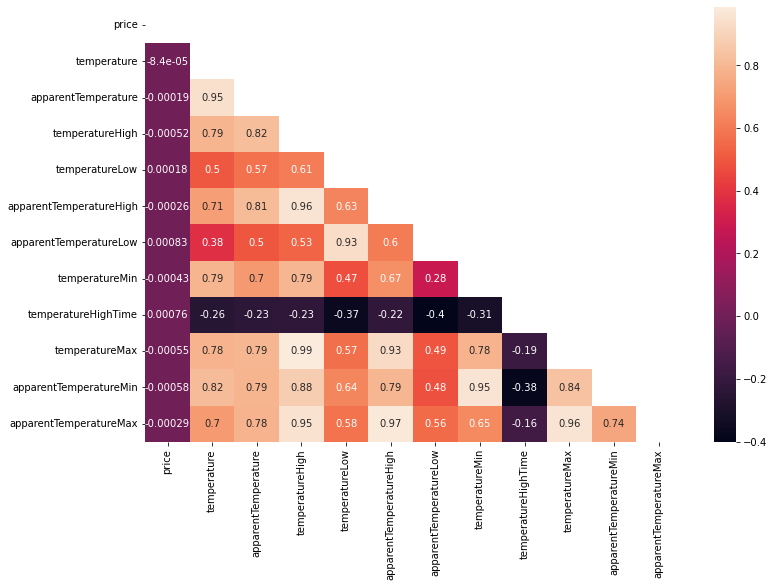

In [61]:
plt.figure(figsize=(12,8))
sns.heatmap(df_temp.corr(), annot=True, mask=np.triu(df_temp.corr()))

In [62]:
df_temp = df[['temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
            'apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin',
            'apparentTemperatureMax']]
df = df.drop(df_temp.columns, axis=1)
print(df.shape)
df.head()

(637976, 28)


,hour,day,month,source,destination,cab_type,product_id,name,price,distance,...,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,moonPhase,precipIntensityMax
0,9,16,12,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,...,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,0.30,0.1276
1,2,27,11,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,...,rain,41.83,1003.97,90,1.00,0,4.786,291.1,0.64,0.1300
2,1,28,11,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,...,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,0.68,0.1064
3,4,30,11,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,...,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,0.75,0.0000
4,3,29,11,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,...,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,0.72,0.0001


- Mengecek korelasi pada feature yang memiliki persamaan karakter (climate) terhadap 'price'

In [63]:
df_climate = df[['price','precipIntensity','precipProbability','humidity','windSpeed','windGust',
               'visibility','dewPoint','pressure','windBearing','cloudCover','uvIndex','visibility.1',
               'ozone','moonPhase','precipIntensityMax']]
df_climate.head()

,price,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,moonPhase,precipIntensityMax
0,5.0,0.0000,0.0,0.68,8.66,9.17,10.000,32.70,1021.98,57,0.72,0,10.000,303.8,0.30,0.1276
1,11.0,0.1299,1.0,0.94,11.98,11.98,4.786,41.83,1003.97,90,1.00,0,4.786,291.1,0.64,0.1300
2,7.0,0.0000,0.0,0.75,7.33,7.33,10.000,31.10,992.28,240,0.03,0,10.000,315.7,0.68,0.1064
3,26.0,0.0000,0.0,0.73,5.28,5.28,10.000,26.64,1013.73,310,0.00,0,10.000,291.1,0.75,0.0000
4,9.0,0.0000,0.0,0.70,9.14,9.14,10.000,28.61,998.36,303,0.44,0,10.000,347.7,0.72,0.0001


- Membuat heatmap korelasi (climate)

<AxesSubplot:>

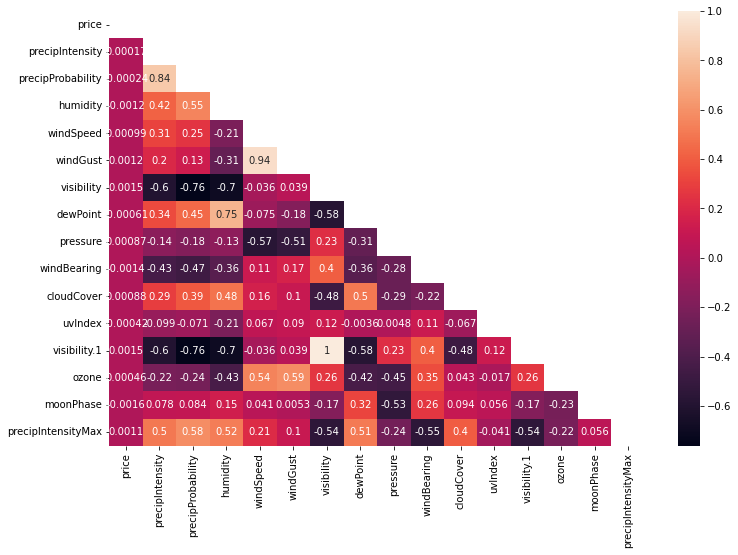

In [64]:
plt.figure(figsize=(12,8))
sns.heatmap(df_climate.corr(), annot=True, mask=np.triu(df_climate.corr()))

In [66]:
df_climate = df[['precipIntensity','precipProbability','humidity','windSpeed','windGust',
               'visibility','dewPoint','pressure','windBearing','cloudCover','uvIndex','visibility.1',
               'ozone','moonPhase','precipIntensityMax']]
df = df.drop(df_climate.columns, axis=1)
print(df.shape)
df.head()

(637976, 13)


,hour,day,month,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,short_summary,icon
0,9,16,12,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,Mostly Cloudy,partly-cloudy-night
1,2,27,11,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,Rain,rain
2,1,28,11,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,Clear,clear-night
3,4,30,11,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,Clear,clear-night
4,3,29,11,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,Partly Cloudy,partly-cloudy-night


**Melihat kembali data setelah dilakukan cleaning**

In [67]:
df

,hour,day,month,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,short_summary,icon
0,9,16,12,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,Mostly Cloudy,partly-cloudy-night
1,2,27,11,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,Rain,rain
2,1,28,11,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,Clear,clear-night
3,4,30,11,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,Clear,clear-night
4,3,29,11,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,Partly Cloudy,partly-cloudy-night
...,...,...,...,...,...,...,...,...,...,...,...,...,...
637971,23,1,12,West End,North End,Uber,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,9.5,1.00,1.0,Partly Cloudy,partly-cloudy-night
637972,23,1,12,West End,North End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,13.0,1.00,1.0,Partly Cloudy,partly-cloudy-night
637973,23,1,12,West End,North End,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,9.5,1.00,1.0,Partly Cloudy,partly-cloudy-night
637974,23,1,12,West End,North End,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,27.0,1.00,1.0,Partly Cloudy,partly-cloudy-night


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637976 entries, 0 to 637975
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   hour              637976 non-null  int64  
 1   day               637976 non-null  int64  
 2   month             637976 non-null  int64  
 3   source            637976 non-null  object 
 4   destination       637976 non-null  object 
 5   cab_type          637976 non-null  object 
 6   product_id        637976 non-null  object 
 7   name              637976 non-null  object 
 8   price             637976 non-null  float64
 9   distance          637976 non-null  float64
 10  surge_multiplier  637976 non-null  float64
 11  short_summary     637976 non-null  object 
 12  icon              637976 non-null  object 
dtypes: float64(3), int64(3), object(7)
memory usage: 63.3+ MB


In [68]:
df.isnull().sum()

hour                0
day                 0
month               0
source              0
destination         0
cab_type            0
product_id          0
name                0
price               0
distance            0
surge_multiplier    0
short_summary       0
icon                0
dtype: int64

# Data Visualization

In [72]:
df_uber = df[df['cab_type']=='Uber']
df_lyft = df[df['cab_type']=='Lyft']

In [73]:
df_uber.head()

,hour,day,month,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,short_summary,icon
12,22,30,11,North End,West End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,12.0,1.11,1.0,Overcast,cloudy
13,10,13,12,North End,West End,Uber,6c84fd89-3f11-4782-9b50-97c468b19529,Black,16.0,1.11,1.0,Clear,clear-night
14,19,13,12,North End,West End,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,7.5,1.11,1.0,Mostly Cloudy,partly-cloudy-day
15,23,16,12,North End,West End,Uber,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,7.5,1.11,1.0,Light Rain,rain
16,0,14,12,North End,West End,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,26.0,1.11,1.0,Overcast,cloudy


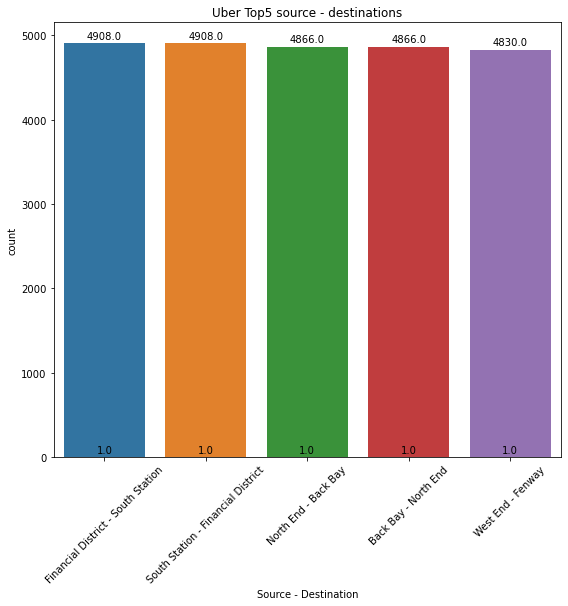

In [88]:
df_uber_2 = df_uber.groupby(['source','destination']).size().reset_index()
df_uber_2.columns = ['source','destination','total']
df_uber_2.sort_values('total', ascending=False, inplace=True)
df_uber_top5  = df_uber_2.head(5)
df_uber_top5 ["Source - Destination"] = df_uber_2["source"] + " - " + df_uber_2["destination"]
df_uber_top5  = df_uber_top5[["Source - Destination", "total"]]

#plotting bar plot
plt.figure(figsize=(20, 8))
plt.subplot(121)
bp_uber =sns.barplot(data = df_uber_top5 , x = "Source - Destination", y = "total")
bp_uber.set_title("Uber Top5 source - destinations")
loc, labels = plt.xticks()
bp_uber.set_xticklabels(labels, rotation=45);
ax = sns.countplot(x='Source - Destination', data=df_uber_top5)
for i in ax.patches:
    ax.annotate(format(i.get_height(),'0.1f'), (i.get_x() + i.get_width()/2.,i.get_height()),
               ha='center', va='center', xytext=(0,7), textcoords='offset points')

In [82]:
df_lyft.head()

,hour,day,month,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,short_summary,icon
0,9,16,12,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,Mostly Cloudy,partly-cloudy-night
1,2,27,11,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,Rain,rain
2,1,28,11,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,Clear,clear-night
3,4,30,11,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,Clear,clear-night
4,3,29,11,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,Partly Cloudy,partly-cloudy-night


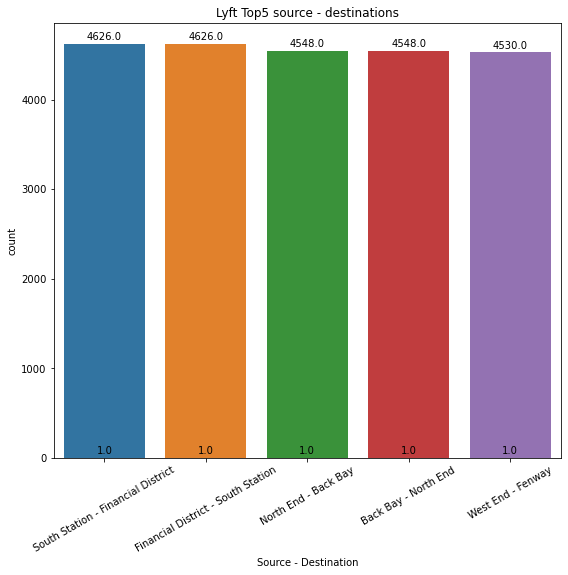

In [90]:
df_lyft_2 = df_lyft.groupby(['source','destination']).size().reset_index()
df_lyft_2.columns = ['source','destination','total']
df_lyft_2.sort_values('total', ascending=False, inplace=True)
df_lyft_top5  = df_lyft_2.head(5)
df_lyft_top5 ["Source - Destination"] = df_lyft_2["source"] + " - " + df_lyft_2["destination"]
df_lyft_top5  = df_lyft_top5[["Source - Destination", "total"]]

#plotting bar plot
plt.figure(figsize=(20, 8))
plt.subplot(121)
bp_lyft =sns.barplot(data = df_lyft_top5 , x = "Source - Destination", y = "total")
bp_lyft.set_title("Lyft Top5 source - destinations")
loc, labels = plt.xticks()
bp_lyft.set_xticklabels(labels, rotation=30);
ax = sns.countplot(x='Source - Destination', data=df_lyft_top5)
for i in ax.patches:
    ax.annotate(format(i.get_height(),'0.1f'), (i.get_x() + i.get_width()/2.,i.get_height()),
               ha='center', va='center', xytext=(0,7), textcoords='offset points')

In [97]:
df_nilai = pd.DataFrame({'Grade' : ['A','A','A','A','A','A','A','A','A',
                                   'A','A','A','A','A','A','A','A','A','A','A',
                                   'B','B','B','B','B','B','B','B','C','C',
                                   'C','C','C','C','C','C','D','D','E','E']})
df_nilai

,Grade
0,A
1,A
2,A
3,A
4,A
5,A
6,A
7,A
8,A
9,A


In [98]:
df_nilai.groupby(['Grade']).head(4)

,Grade
0,A
1,A
2,A
3,A
20,B
21,B
22,B
23,B
28,C
29,C


In [99]:
df_7 = pd.read_csv('./Dataset/insurance.csv')
df_7

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [101]:
female = df_7[(df_7['sex']=='female') & (df_7['smoker']=='yes')]
female

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
11,62,female,26.290,0,yes,southeast,27808.72510
23,34,female,31.920,1,yes,northeast,37701.87680
58,53,female,22.880,1,yes,southeast,23244.79020
64,20,female,22.420,0,yes,northwest,14711.74380
...,...,...,...,...,...,...,...
1308,25,female,30.200,0,yes,southwest,33900.65300
1313,19,female,34.700,2,yes,southwest,36397.57600
1314,30,female,23.655,3,yes,northwest,18765.87545
1323,42,female,40.370,2,yes,southeast,43896.37630


In [105]:
female['charges'].mean()

30678.996276260867

In [106]:
df_7[(df_7['age']==64) & (df_7['children']==1)]

,age,sex,bmi,children,smoker,region,charges
62,64,male,24.70,1,no,northwest,30166.61817
328,64,female,33.80,1,yes,southwest,47928.03000
418,64,male,39.16,1,no,southeast,14418.28040


In [107]:
df_7.groupby('region')['bmi'].mean()

region
northeast    29.173503
northwest    29.199785
southeast    33.355989
southwest    30.596615
Name: bmi, dtype: float64

In [112]:
male = df_7[(df_7['sex']=='male') & (df_7['smoker']=='yes') & (df_7['age']>50)]
male

,age,sex,bmi,children,smoker,region,charges
39,60,male,39.900,0,yes,southwest,48173.36100
55,58,male,36.955,2,yes,northwest,47496.49445
92,59,male,29.830,3,yes,northeast,30184.93670
98,56,male,19.950,0,yes,northeast,22412.64850
109,63,male,35.090,0,yes,southeast,47055.53210
252,54,male,34.210,2,yes,southeast,44260.74990
256,56,male,33.630,0,yes,northwest,43921.18370
262,52,male,24.320,3,yes,northeast,24869.83680
281,54,male,40.565,3,yes,northeast,48549.17835
331,52,male,27.360,0,yes,northwest,24393.62240


In [115]:
male['bmi_baru']=(male['bmi']-1.5)
male

,age,sex,bmi,children,smoker,region,charges,bmi_baru
39,60,male,39.900,0,yes,southwest,48173.36100,38.400
55,58,male,36.955,2,yes,northwest,47496.49445,35.455
92,59,male,29.830,3,yes,northeast,30184.93670,28.330
98,56,male,19.950,0,yes,northeast,22412.64850,18.450
109,63,male,35.090,0,yes,southeast,47055.53210,33.590
252,54,male,34.210,2,yes,southeast,44260.74990,32.710
256,56,male,33.630,0,yes,northwest,43921.18370,32.130
262,52,male,24.320,3,yes,northeast,24869.83680,22.820
281,54,male,40.565,3,yes,northeast,48549.17835,39.065
331,52,male,27.360,0,yes,northwest,24393.62240,25.860


In [116]:
male['bmi_baru'].mean()

30.6904054054054